In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Creation du dataset

We use a dataset of reannotated WMT Chinese to ENglish test sets of NewsTest2020, rated by professionnal translators with a Scalar Quality Metric.


According to the author : 
"Similar to the WMT setting, the Scalar Quality Metric (SQM) evaluation collects segment-level scalar ratings with document context. Different from the 0-100 assessment of translation quality used in WMT, SQM uses a 0-6 scale for translation quality assessment. Another difference is that the sentences were rated by professional translators instead of crowd workers or researchers. We refer to pSQM for SQM labels that were acquired with professional translators."

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/google/wmt-mqm-human-evaluation/main/newstest2020/zhen/psqm_newstest2020_zhen.tsv', sep = '\t')
df

,system,doc,doc_id,seg_id,rater,source,target,score
0,DeepMind.381,xinhua-zh-01.6565,1,1,rater2,国有企业和优势民营企业走进赣南革命老区。,State-owned enterprises and dominant private e...,2
1,DeepMind.381,xinhua-zh-01.6565,1,1,rater4,国有企业和优势民营企业走进赣南革命老区。,State-owned enterprises and dominant private e...,4
2,DeepMind.381,xinhua-zh-01.6565,1,1,rater6,国有企业和优势民营企业走进赣南革命老区。,State-owned enterprises and dominant private e...,2
3,DiDi_NLP.401,xinhua-zh-01.6565,1,1,rater2,国有企业和优势民营企业走进赣南革命老区。,State-owned enterprises and advantageous priva...,2
4,DiDi_NLP.401,xinhua-zh-01.6565,1,1,rater4,国有企业和优势民营企业走进赣南革命老区。,State-owned enterprises and advantageous priva...,6
...,...,...,...,...,...,...,...,...
59917,THUNLP.1498,chinanews.com.102503,14,2000,rater4,考虑到优先股在公司法上已有较成熟的理论探讨，建议将其作为防范入股失地风险的倡导性规定。,Considering that the preferred stock has a mat...,5
59918,THUNLP.1498,chinanews.com.102503,14,2000,rater6,考虑到优先股在公司法上已有较成熟的理论探讨，建议将其作为防范入股失地风险的倡导性规定。,Considering that the preferred stock has a mat...,4
59919,WeChat_AI.1525,chinanews.com.102503,14,2000,rater3,考虑到优先股在公司法上已有较成熟的理论探讨，建议将其作为防范入股失地风险的倡导性规定。,Considering that preferred shares have a matur...,4
59920,WeChat_AI.1525,chinanews.com.102503,14,2000,rater4,考虑到优先股在公司法上已有较成熟的理论探讨，建议将其作为防范入股失地风险的倡导性规定。,Considering that preferred shares have a matur...,4


In [ ]:
df = df.dropna(subset=['source', 'target'])

In [ ]:
#Averaging the score of raters to get a continuous score for each target
df1 = df.groupby(['source','target'])
df2 = df1.mean().reset_index()
df2

,source,target,doc_id,seg_id,score
0,(新中国70年)白皮书：中国的发展对世界是机遇，不是威胁和挑战。,(70 Years of New China) White Paper: China's d...,2.0,1535.0,4.333333
1,(新中国70年)白皮书：中国的发展对世界是机遇，不是威胁和挑战。,(70 Years of New China) White Paper: China's d...,2.0,1535.0,4.500000
2,(新中国70年)白皮书：中国的发展对世界是机遇，不是威胁和挑战。,(70 Years of New China) White Paper: China’s D...,2.0,1535.0,4.000000
3,(新中国70年)白皮书：中国的发展对世界是机遇，不是威胁和挑战。,(70 years of New China) White Paper: China's d...,2.0,1535.0,5.000000
4,(新中国70年)白皮书：中国的发展对世界是机遇，不是威胁和挑战。,(70 years of New China) White paper: China's d...,2.0,1535.0,4.500000
...,...,...,...,...,...
17895,（迪拜27日电）从即日起，沙特正式对49个国家放开旅游签证，其中包含中国，签证费一共为440...,"(Dubai, 27th) From now on, Saudi Arabia offici...",2.0,1139.0,2.333333
17896,（迪拜27日电）从即日起，沙特正式对49个国家放开旅游签证，其中包含中国，签证费一共为440...,"(Dubai, 27th) From now on, Saudi Arabia offici...",2.0,1139.0,3.666667
17897,（迪拜27日电）从即日起，沙特正式对49个国家放开旅游签证，其中包含中国，签证费一共为440...,"(Dubai, 27th) From now on, Saudi Arabia will o...",2.0,1139.0,3.666667
17898,（迪拜27日电）从即日起，沙特正式对49个国家放开旅游签证，其中包含中国，签证费一共为440...,"(Dubai, May 27) From now on, Saudi Arabia offi...",2.0,1139.0,2.000000


We here made the assumption that if one of the annotator rated the target 6, this means it can be used as a reference translation. 

In [ ]:
reference = df2[df2['score']>5].groupby('source')['target'].apply(list).to_dict()

In [ ]:
dic = [{'source' : i, 'ref' : reference[i]} for i in reference.keys()]
dic

[{'source': '10月21日，新一届加拿大联邦立法选举即将开始，特鲁多还能重演5年前大获全胜的剧目吗？',
  'ref': ['As a new term of federal legislative election in Canada is about to start on October 21, will Trudeau be able to replay the drama of a big win five years ago?',
   'On October 21, the new Canadian federal legislative election is about to begin. Can Trudeau repeat the drama of his great victory five years ago?',
   'On October 21st, when the new Canadian federal legislative election is about to begin, will Trudeau be able to reproduce his victory five years ago?']},
 {'source': '1933年，他创作了交响乐苦难（Miserae）并将这部作品献给“我长眠的朋友们 ” 。',
  'ref': ['He composed the symphony "Miserae" in 1933 and dedicated it to "my friends who sleep for all eternity."',
   'In 1933, he created the symphony Miserae and dedicated this work to "my friends who sleep forever."']},
 {'source': '1935年，这首交响乐作品在布拉格举行首演，但遭到纳粹官僚的骚扰。',
  'ref': ['In 1935, the symphony had its premiere in Prague, but was harassed by Nazi bureaucrats.',
   'In 1935, the symphony

In [ ]:
df3 = pd.DataFrame.from_dict(dic)
df3

,source,ref
0,10月21日，新一届加拿大联邦立法选举即将开始，特鲁多还能重演5年前大获全胜的剧目吗？,[As a new term of federal legislative election...
1,1933年，他创作了交响乐苦难（Miserae）并将这部作品献给“我长眠的朋友们 ” 。,"[He composed the symphony ""Miserae"" in 1933 an..."
2,1935年，这首交响乐作品在布拉格举行首演，但遭到纳粹官僚的骚扰。,"[In 1935, the symphony had its premiere in Pra..."
3,1967年5月出生的丛培武毕业于外交学院。,"[Born in May 1967, Cong Peiwu graduated from C..."
4,1986年7月，王伯祥第一次以县委书记的身份参加潍坊市工业会议。,"[In July 1986, Wang Boxiang attended the Weifa..."
...,...,...
688,香港新闻界等各界人士约500人出席酒会，并与主礼嘉宾一同举杯，为中华人民共和国成立70周年送...,"[About 500 people from all walks of life, incl..."
689,马方坚持一个中国政策，感谢中方给予马拉维的支持和帮助。,"[Malawi adheres to the one-China policy, and i..."
690,马方期待马中关系进一步发展，欢迎更多中方企业赴马投资兴业。,[Malawi looks forward to deepening ties with C...
691,马里总统凯塔在接受中央广播电视总台记者专访时表示，他曾多次到访中国，过去70年间中国的发展成...,[In an exclusive interview with a reporter fro...


In [ ]:

#Adding reference translation
df4 = df2.merge(df3, left_on='source', right_on='source')
df4

,source,target,doc_id,seg_id,score,ref
0,10月21日，新一届加拿大联邦立法选举即将开始，特鲁多还能重演5年前大获全胜的剧目吗？,As a new term of federal legislative election ...,22.0,409.0,5.666667,[As a new term of federal legislative election...
1,10月21日，新一届加拿大联邦立法选举即将开始，特鲁多还能重演5年前大获全胜的剧目吗？,"On October 21, the new Canadian federal legisl...",22.0,409.0,5.333333,[As a new term of federal legislative election...
2,10月21日，新一届加拿大联邦立法选举即将开始，特鲁多还能重演5年前大获全胜的剧目吗？,"On October 21, the new Canadian federal legisl...",22.0,409.0,4.666667,[As a new term of federal legislative election...
3,10月21日，新一届加拿大联邦立法选举即将开始，特鲁多还能重演5年前大获全胜的剧目吗？,"On October 21, the new Canadian federal legisl...",22.0,409.0,4.666667,[As a new term of federal legislative election...
4,10月21日，新一届加拿大联邦立法选举即将开始，特鲁多还能重演5年前大获全胜的剧目吗？,"On October 21, the new Canadian federal legisl...",22.0,409.0,4.666667,[As a new term of federal legislative election...
...,...,...,...,...,...,...
5811,齐晓光介绍，擎旗手和基准兵的行进步频虽然只有20余步之差，训练上却要付出更多努力。,Qi Xiaoguang introduced that although there is...,17.0,786.0,4.666667,[The marching step frequencies of the flag bea...
5812,齐晓光介绍，擎旗手和基准兵的行进步频虽然只有20余步之差，训练上却要付出更多努力。,Qi Xiaoguang said that although the marching f...,17.0,786.0,3.000000,[The marching step frequencies of the flag bea...
5813,齐晓光介绍，擎旗手和基准兵的行进步频虽然只有20余步之差，训练上却要付出更多努力。,Qi Xiaoguang said that although the marching f...,17.0,786.0,4.333333,[The marching step frequencies of the flag bea...
5814,齐晓光介绍，擎旗手和基准兵的行进步频虽然只有20余步之差，训练上却要付出更多努力。,"Qi Xiaoguang said that, although the differenc...",17.0,786.0,4.333333,[The marching step frequencies of the flag bea...


In [ ]:
df3.ref.str.len().mean()

2.981240981240981

# Get metrics

We use the Jury library that groups the usual metrics

In [5]:
!pip install jury

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 KB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 25.8 MB/s eta 0:00:00
     ━━━━━━━

In [ ]:
!pip install bert-score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 93.7 MB/s eta 0:00:00


## Bleu, Meteor, Bertscore

In [4]:
def get_metric(metric, references, predictions):   
  scores = jury.evaluate(predictions=[[predictions]], references=[references])
  return scores[metric]['score']

In [ ]:
from jury import Jury

scorer = Jury()

predictions = [
    ["the cat is on the mat", "There is cat playing on the mat"], 
    ["Look!    a wonderful day."]
]
references = [
    ["the cat is playing on the mat.", "The cat plays on the mat."], 
    ["Today is a wonderful day", "The weather outside is wonderful."]
]

jury = Jury(metrics=["bleu", 'meteor', 'bertscore'])
scores = jury.evaluate(predictions=predictions, references=references)
scores = scorer(predictions=predictions, references=references)
scores


{'total_items': 2,
 'empty_items': 0,
 'bleu_1': {'score': 0.8823529411764706,
  'precisions': [0.8823529411764706],
  'brevity_penalty': 1.0,
  'length_ratio': 1.0,
  'translation_length': 11,
  'reference_length': 11},
 'bleu_2': {'score': 0.7531446678801508,
  'precisions': [0.8823529411764706, 0.6428571428571429],
  'brevity_penalty': 1.0,
  'length_ratio': 1.0,
  'translation_length': 11,
  'reference_length': 11},
 'bleu_3': {'score': 0.6364701546539252,
  'precisions': [0.8823529411764706, 0.6428571428571429, 0.45454545454545453],
  'brevity_penalty': 1.0,
  'length_ratio': 1.0,
  'translation_length': 11,
  'reference_length': 11},
 'bleu_4': {'score': 0.42370250917168295,
  'precisions': [0.8823529411764706,
   0.6428571428571429,
   0.45454545454545453,
   0.125],
  'brevity_penalty': 1.0,
  'length_ratio': 1.0,
  'translation_length': 11,
  'reference_length': 11},
 'meteor': {'score': 0.727184593644221},
 'rouge': {'rouge1': 0.7783882783882783,
  'rouge2': 0.592532467532467

In [ ]:
!pip install swifter
import swifter

In [ ]:
from jury import Jury
metrics = ['bleu', 'meteor', 'bertscore']
for metric in metrics :
  jury = Jury(metrics=[metric])
  df4[metric] = df4.swifter.progress_bar(True).apply(lambda row : get_metric(metric, row['ref'],
                     row['target']), axis = 1)
  df4.to_csv('/content/drive/MyDrive/Cours/ENSAE/3A + SFA/S2/Machine Learning for NLP/df_last.tsv', sep ='\t')

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
import pandas as pd 
from ast import literal_eval
df4 = pd.read_csv('/content/drive/MyDrive/Cours/ENSAE/3A + SFA/S2/Machine Learning for NLP/df_last.tsv', sep ='\t', index_col = 0, converters={'ref': literal_eval})

## Rouge

In [ ]:
def get_rouge(references, predictions):   
  scores = jury.evaluate(predictions=[[predictions]], references=[references])
  return scores['rouge']['rouge1'], scores['rouge']['rouge2'], scores['rouge']['rougeL'], scores['rouge']['rougeLsum']

In [ ]:
jury = Jury(metrics=['rouge'])
applied_df = df4.swifter.progress_bar(True).apply(lambda row : get_rouge(row['ref'],
                     row['target']), axis = 1, result_type='expand')
df4 = pd.concat([df4, applied_df], axis='columns')
df4 = df4.rename(columns= {0 :'rouge1', 1 : 'rouge2',2 : 'rougeL',3:'rougeLsum'})
d4.to_csv('/content/drive/MyDrive/Cours/ENSAE/3A + SFA/S2/Machine Learning for NLP/df_last.tsv', sep ='\t')

  0%|          | 0/500 [00:00<?, ?it/s]

## Bleurt

In [ ]:
!pip install git+https://github.com/devrimcavusoglu/bleurt.git

In [ ]:
from jury import Jury
metrics = ['bleurt']
for metric in metrics :
  jury = Jury(metrics=[metric])
  df4[metric] = df4.swifter.progress_bar(True).apply(lambda row : get_metric(metric, row['ref'],
                     row['target']), axis = 1)
  df4.to_csv('/content/drive/MyDrive/Cours/ENSAE/3A + SFA/S2/Machine Learning for NLP/df_last.tsv', sep ='\t')

In [ ]:
df4

,source,target,doc_id,seg_id,score,ref,bleu,meteor,bertscore,bleurt
0,10月21日，新一届加拿大联邦立法选举即将开始，特鲁多还能重演5年前大获全胜的剧目吗？,As a new term of federal legislative election ...,22.0,409.0,5.666667,[As a new term of federal legislative election...,1.000000,0.999985,0.935593,0.928548
1,10月21日，新一届加拿大联邦立法选举即将开始，特鲁多还能重演5年前大获全胜的剧目吗？,"On October 21, the new Canadian federal legisl...",22.0,409.0,5.333333,[As a new term of federal legislative election...,1.000000,0.999968,0.921882,0.958657
2,10月21日，新一届加拿大联邦立法选举即将开始，特鲁多还能重演5年前大获全胜的剧目吗？,"On October 21, the new Canadian federal legisl...",22.0,409.0,4.666667,[As a new term of federal legislative election...,0.820720,0.916033,0.916039,0.610459
3,10月21日，新一届加拿大联邦立法选举即将开始，特鲁多还能重演5年前大获全胜的剧目吗？,"On October 21, the new Canadian federal legisl...",22.0,409.0,4.666667,[As a new term of federal legislative election...,0.779515,0.876165,0.911331,0.552448
4,10月21日，新一届加拿大联邦立法选举即将开始，特鲁多还能重演5年前大获全胜的剧目吗？,"On October 21, the new Canadian federal legisl...",22.0,409.0,4.666667,[As a new term of federal legislative election...,0.756156,0.916033,0.913186,0.453338
...,...,...,...,...,...,...,...,...,...,...
5811,齐晓光介绍，擎旗手和基准兵的行进步频虽然只有20余步之差，训练上却要付出更多努力。,Qi Xiaoguang introduced that although there is...,17.0,786.0,4.666667,[The marching step frequencies of the flag bea...,0.171061,0.446429,0.907791,-0.132540
5812,齐晓光介绍，擎旗手和基准兵的行进步频虽然只有20余步之差，训练上却要付出更多努力。,Qi Xiaoguang said that although the marching f...,17.0,786.0,3.000000,[The marching step frequencies of the flag bea...,0.000000,0.362718,0.902910,-0.007224
5813,齐晓光介绍，擎旗手和基准兵的行进步频虽然只有20余步之差，训练上却要付出更多努力。,Qi Xiaoguang said that although the marching f...,17.0,786.0,4.333333,[The marching step frequencies of the flag bea...,0.000000,0.393999,0.908066,0.098587
5814,齐晓光介绍，擎旗手和基准兵的行进步频虽然只有20余步之差，训练上却要付出更多努力。,"Qi Xiaoguang said that, although the differenc...",17.0,786.0,4.333333,[The marching step frequencies of the flag bea...,0.137349,0.513504,0.908767,0.023239


##Baryscore

In [ ]:
!pip install git+https://github.com/PierreColombo/nlg_eval_via_simi_measures.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/PierreColombo/nlg_eval_via_simi_measures.git to /tmp/pip-req-build-2h1hogwv
  Running command git clone --filter=blob:none --quiet https://github.com/PierreColombo/nlg_eval_via_simi_measures.git /tmp/pip-req-build-2h1hogwv
  Resolved https://github.com/PierreColombo/nlg_eval_via_simi_measures.git to commit 7bb4476c76002fd95062e78040348f278a9ea194
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 44.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.3/682.3 KB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 96.5 MB/s eta 0:00:00
  Created wheel for nlg-eval-via-simi-measures: filename=nlg_eval_via_simi_measures-0.1.0.dev0-py3-none-any.whl size=1818

In [ ]:
from nlg_eval_via_simi_measures import BaryScoreMetric
metric_call = BaryScoreMetric()

ref = ['I hate these cakes!']
hypothesis = ['I like my cakes very much']

metric_call.prepare_idfs(ref, hypothesis)
final_preds = metric_call.evaluate_batch(ref, hypothesis)
print(final_preds)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
BaryScore Progress:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/ot/bregman.py:485: RuntimeWarning: divide by zero encountered in true_divide
  u = 1. / nx.dot(Kp, v)
/usr/local/lib/python3.8/dist-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %

{'baryscore_W': [0.5093745484165041], 'baryscore_SD_10': [0.950272303511795], 'baryscore_SD_1': [0.8848964945069122], 'baryscore_SD_5': [0.9440199643806364], 'baryscore_SD_0.1': [0.5336789761603238], 'baryscore_SD_0.5': [0.7972369867674077], 'baryscore_SD_0.01': [0.5093769139182677], 'baryscore_SD_0.001': [2.270852946332045e-85]}


In [ ]:
def bary(refs, target):
  baryscore_W = []
  baryscore_SD_10 = []
  baryscore_SD_1 = []
  baryscore_SD_5 = []
  baryscore_SD_01 = []
  baryscore_SD_05 = []
  baryscore_SD_001 = []
  baryscore_SD_0001 = []
  target = [target]
  for ref in refs:
    ref = [ref]
    metric_call.prepare_idfs(ref, target)
    final_preds = metric_call.evaluate_batch(ref, target)
    baryscore_W.append(final_preds['baryscore_W'][0])
    baryscore_SD_10.append(final_preds['baryscore_SD_10'][0])
    baryscore_SD_1.append(final_preds['baryscore_SD_1'][0])
    baryscore_SD_5.append(final_preds['baryscore_SD_5'][0])
    baryscore_SD_01.append(final_preds['baryscore_SD_0.1'][0])
    baryscore_SD_05.append(final_preds['baryscore_SD_0.5'][0])
    baryscore_SD_001.append(final_preds['baryscore_SD_0.01'][0])
    baryscore_SD_0001.append(final_preds['baryscore_SD_0.001'][0])
  baryscore_W = sum(baryscore_W)/len(baryscore_W) 
  baryscore_SD_10 = sum(baryscore_SD_10)/len(baryscore_SD_10) 
  baryscore_SD_1 = sum(baryscore_SD_1)/len(baryscore_SD_1) 
  baryscore_SD_5 = sum(baryscore_SD_5)/len(baryscore_SD_5) 
  baryscore_SD_01 = sum(baryscore_SD_01)/len(baryscore_SD_01) 
  baryscore_SD_05 = sum(baryscore_SD_05)/len(baryscore_SD_05) 
  baryscore_SD_001 = sum(baryscore_SD_001)/len(baryscore_SD_001) 
  baryscore_SD_0001 = sum(baryscore_SD_0001)/len(baryscore_SD_0001) 

  return baryscore_W,baryscore_SD_10,baryscore_SD_1,baryscore_SD_5,baryscore_SD_01,baryscore_SD_05,baryscore_SD_001,baryscore_SD_0001

In [ ]:
import swifter 
applied_df = df4.swifter.progress_bar(True).apply(lambda row : bary(row['ref'],
                     row['target']), axis = 1, result_type='expand')
df4 = pd.concat([df4, applied_df], axis='columns')
df4 = df4.rename(columns= {0 :'baryscore_W', 1 : 'baryscore_SD_10',2 : 'baryscore_SD_1',3:'baryscore_SD_5', 4:'baryscore_SD_0.1',5:'baryscore_SD_0.5', 6:'baryscore_SD_0.01', 7 : 'baryscore_SD_0.001'})
df4.to_csv('/content/drive/MyDrive/Cours/ENSAE/3A + SFA/S2/Machine Learning for NLP/df_last.tsv', sep ='\t')

  0%|          | 0/500 [00:00<?, ?it/s]

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.

BaryScore Progress:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 12
  warnings.warn('Warning: numerical errors at iteration %d' % ii)

BaryScore Progress: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

BaryScore Progress:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 5612
  warnings.warn('Warning: numerical errors at iteration %d' % ii)

BaryScore Progress: 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

BaryScore Progress: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

BaryScore Progress: 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

BaryScore Progress: 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

BaryScore Progress: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

BaryScore Progress: 100%|██████████| 1/1 [0

In [ ]:
df4

## DepthScore

In [ ]:
from nlg_eval_via_simi_measures import DepthScoreMetric
metric_call = DepthScoreMetric()

ref = ['I hate these cakes!']
hypothesis = ['I like my cakes very much']

metric_call.prepare_idfs(ref, hypothesis)
final_preds = metric_call.evaluate_batch(ref, hypothesis)
print(final_preds)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Depth Score Progress: 100%|██████████| 1/1 [00:05<00:00,  5.73s/it]

{'depth_score': [0.11104687167555755]}


In [ ]:
def depth(refs, target):
  depthscore = []
  target = [target]
  for ref in refs:
    ref = [ref]
    metric_call.prepare_idfs(ref, target)
    final_preds = metric_call.evaluate_batch(ref, target)
    depthscore.append(final_preds['depth_score'][0])
  depthscore = sum(depthscore)/len(depthscore) 
  return depthscore

In [ ]:
import swifter
df4['depth_score'] = df4.swifter.progress_bar(True).apply(lambda row : depth(row['ref'],
                     row['target']), axis = 1)
df4.to_csv('/content/drive/MyDrive/Cours/ENSAE/3A + SFA/S2/Machine Learning for NLP/df_last.tsv', sep ='\t')

  0%|          | 0/500 [00:00<?, ?it/s]


Depth Score Progress: 100%|██████████| 1/1 [00:05<00:00,  5.33s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:03<00:00,  3.93s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:03<00:00,  3.51s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:05<00:00,  5.90s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:05<00:00,  5.29s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:04<00:00,  4.72s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:04<00:00,  4.01s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:05<00:00,  5.54s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]

Depth Score Progress: 100%|██████

# Test : Multi lingual score

On teste les métrique avec un modèle multilinguistique pour leur comportement avec le texte original (donc dans la langue originale)comme référence.

In [ ]:
from nlg_eval_via_simi_measures import BaryScoreMetric
BaryScoreMulti = BaryScoreMetric('distilbert-base-multilingual-cased')



BaryScore Progress:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/ot/bregman.py:484: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/usr/local/lib/python3.8/dist-packages/ot/bregman.py:484: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/usr/local/lib/python3.8/dist-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
BaryScore Progress: 100%|██████████| 1/1 [00:00<00:00, 24.30it/s]

{'baryscore_W': [0.5363663047768669], 'baryscore_SD_10': [0.706038639850961], 'baryscore_SD_1': [0.6960280620873386], 'baryscore_SD_5': [0.7050335492528446], 'baryscore_SD_0.1': [0.5817924344227892], 'baryscore_SD_0.5': [0.6824288788883299], 'baryscore_SD_0.01': [0.5373835654754942], 'baryscore_SD_0.001': [6.936166989422225e-15]}


In [ ]:
ref = ["Le chat est sur le fauteil"]
hypothesis = ['I like my cakes very much']

BaryScoreMulti.prepare_idfs(ref, hypothesis)
final_preds = BaryScoreMulti.evaluate_batch(ref, hypothesis)
print(final_preds)

BaryScore Progress:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/ot/bregman.py:517: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
BaryScore Progress: 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]

{'baryscore_W': [0.5533168179235871], 'baryscore_SD_10': [0.7173118661246929], 'baryscore_SD_1': [0.7090105891985685], 'baryscore_SD_5': [0.7164724154482971], 'baryscore_SD_0.1': [0.6084509990551459], 'baryscore_SD_0.5': [0.6978866834729698], 'baryscore_SD_0.01': [0.5546735193469836], 'baryscore_SD_0.001': [7.989624396663992e-23]}


In [ ]:
def multibert_bary(refs, target):
    BaryScoreMulti.prepare_idfs([refs], [target])
    final_preds = BaryScoreMulti.evaluate_batch([refs], [target])
    baryscore_W = final_preds['baryscore_W'][0]
    baryscore_SD_10 = final_preds['baryscore_SD_10'][0]
    baryscore_SD_1 = final_preds['baryscore_SD_1'][0]
    baryscore_SD_5 = final_preds['baryscore_SD_5'][0]
    baryscore_SD_01 = final_preds['baryscore_SD_0.1'][0]
    baryscore_SD_05 = final_preds['baryscore_SD_0.5'][0]
    baryscore_SD_001 = final_preds['baryscore_SD_0.01'][0]
    baryscore_SD_0001 = final_preds['baryscore_SD_0.001'][0] 

    return baryscore_W,baryscore_SD_10,baryscore_SD_1,baryscore_SD_5,baryscore_SD_01,baryscore_SD_05,baryscore_SD_001,baryscore_SD_0001

In [6]:
import pandas as pd
import swifter
from ast import literal_eval
df_tiny = pd.read_csv('/content/drive/MyDrive/Cours/ENSAE/3A + SFA/S2/Machine Learning for NLP/df_last_tiny.tsv', sep ='\t', index_col = 0, converters={'ref': literal_eval})

In [ ]:
applied_df = df_tiny.swifter.progress_bar(True).apply(lambda row : multibert_bary(row['source'],
                     row['target']), axis = 1, result_type='expand')
df_tiny = pd.concat([df_tiny, applied_df], axis='columns')
df_tiny = df_tiny.rename(columns= {0 :'multi_baryscore_W', 1 : 'multi_baryscore_SD_10',2 : 'multi_baryscore_SD_1',3:'multi_baryscore_SD_5', 4:'multi_baryscore_SD_0.1',5:'multi_baryscore_SD_0.5', 6:'multi_baryscore_SD_0.01', 7 : 'multi_baryscore_SD_0.001'})
df_tiny.to_csv('/content/drive/MyDrive/Cours/ENSAE/3A + SFA/S2/Machine Learning for NLP/df_last_tiny.tsv', sep ='\t')

  0%|          | 0/500 [00:00<?, ?it/s]


BaryScore Progress:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/ot/bregman.py:485: RuntimeWarning: divide by zero encountered in true_divide
  u = 1. / nx.dot(Kp, v)
/usr/local/lib/python3.8/dist-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)

BaryScore Progress: 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]

BaryScore Progress: 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

BaryScore Progress:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/ot/bregman.py:517: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "

BaryScore Progress: 100%|██████████| 1/1 [00:01<00:00,  1.92s/it]

BaryScore Progress:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/o

In [ ]:
from nlg_eval_via_simi_measures import DepthScoreMetric
DepthScoreMulti = DepthScoreMetric('distilbert-base-multilingual-cased', layers_to_consider = 6)

In [ ]:
def multibert_depth(refs, target):
    DepthScoreMulti.prepare_idfs([refs], [target])
    final_preds = DepthScoreMulti.evaluate_batch([refs], [target])
    depthscore = final_preds['depth_score'][0]
    return depthscore

In [ ]:
import swifter
df_tiny['multi_depth_score'] = df_tiny.swifter.progress_bar(True).apply(lambda row : multibert_depth(row['source'],
                     row['target']), axis = 1)
df_tiny.to_csv('/content/drive/MyDrive/Cours/ENSAE/3A + SFA/S2/Machine Learning for NLP/df_last_tiny.tsv', sep ='\t')

  0%|          | 0/500 [00:00<?, ?it/s]


Depth Score Progress: 100%|██████████| 1/1 [00:06<00:00,  6.34s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:04<00:00,  4.01s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:02<00:00,  2.83s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:04<00:00,  4.22s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:03<00:00,  3.58s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:03<00:00,  3.04s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:04<00:00,  4.50s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:05<00:00,  5.51s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:04<00:00,  4.01s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:05<00:00,  5.31s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:06<00:00,  6.67s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:04<00:00,  4.60s/it]

Depth Score Progress: 100%|██████

In [1]:
!pip install bert-score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 10.3 MB/s eta 0:00:00


In [8]:
!pip install swifter
from jury import Jury
import swifter
jury = Jury(metrics=['bertscore'])
df_tiny['bertscore_multi'] = df_tiny.swifter.progress_bar(True).apply(lambda row : get_metric('bertscore', row['source'],
                     row['target']), axis = 1)
df_tiny.to_csv('/content/drive/MyDrive/Cours/ENSAE/3A + SFA/S2/Machine Learning for NLP/df_last_tiny_v2.tsv', sep ='\t')

Pandas Apply:   0%|          | 0/500 [00:00<?, ?it/s]

In [27]:
from bert_score import score
df_tiny['bertscore_multi_v2'] = df_tiny.swifter.progress_bar(True).apply(lambda row : score([row['source']],
                     [row['target']],"bert-base-multilingual-cased"), axis = 1)
df_tiny.to_csv('/content/drive/MyDrive/Cours/ENSAE/3A + SFA/S2/Machine Learning for NLP/df_last_tiny_v2.tsv', sep ='\t')

Pandas Apply:   0%|          | 0/500 [00:00<?, ?it/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.pr

In [43]:
def get_mean(lst):
  return torch.mean(torch.stack(lst)).item()

In [44]:
df_tiny['bertscore_multi_v2'] = df_tiny.swifter.progress_bar(True).apply(lambda row : get_mean(row['bertscore_multi_v2']), axis = 1)

Pandas Apply:   0%|          | 0/500 [00:00<?, ?it/s]

In [48]:
df_tiny.to_csv('/content/drive/MyDrive/Cours/ENSAE/3A + SFA/S2/Machine Learning for NLP/df_last_tiny_v2.tsv', sep ='\t')

# Essai avec Sentence Transformers

In [ ]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 23.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=787a88a357c5609f5bdb284a9498eee2803a39a5e4362d1864a7930a379103eb
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
embeddings = model.encode(sentences)
print(embeddings)

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch


#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Sentences we want sentence embeddings for
sentences = ['This is an example sentence', 'Each sentence is converted']

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
model = AutoModel.from_pretrained('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

# Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling. In this case, max pooling.
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

print("Sentence embeddings:")
print(sentence_embeddings)

In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')

def STscore(ref, target):
    #Compute embedding for both lists
    embedding_1= model.encode(ref, convert_to_tensor=True)
    embedding_2 = model.encode(target, convert_to_tensor=True)

    return util.pytorch_cos_sim(embedding_1, embedding_2).item()


In [ ]:
import swifter
df_tiny['ST_score'] = df_tiny.swifter.progress_bar(True).apply(lambda row : STscore(row['source'],
                     row['target']), axis = 1)
df_tiny.to_csv('/content/drive/MyDrive/Cours/ENSAE/3A + SFA/S2/Machine Learning for NLP/df_last_tiny.tsv', sep ='\t')

Pandas Apply:   0%|          | 0/500 [00:00<?, ?it/s]

# Essai de métriques entraînables

Pour cette partie et la suivante, l'diée est de créer une métrique qui prend en input le texte d'origine (dans la langue d'origine) et le texte traduit dans une autre langue. Nous allons donc tenter de voir si de telle métrique sont bien corrélées ou non à la notation pSQM du dataset.

Etant donné le côté peu reproductible d'une métrique entraînable, nous developpons ici seulement le code nécessaire à l'entraîenement d'une telle métrique.

## Simple Classifier sur deux BERTs

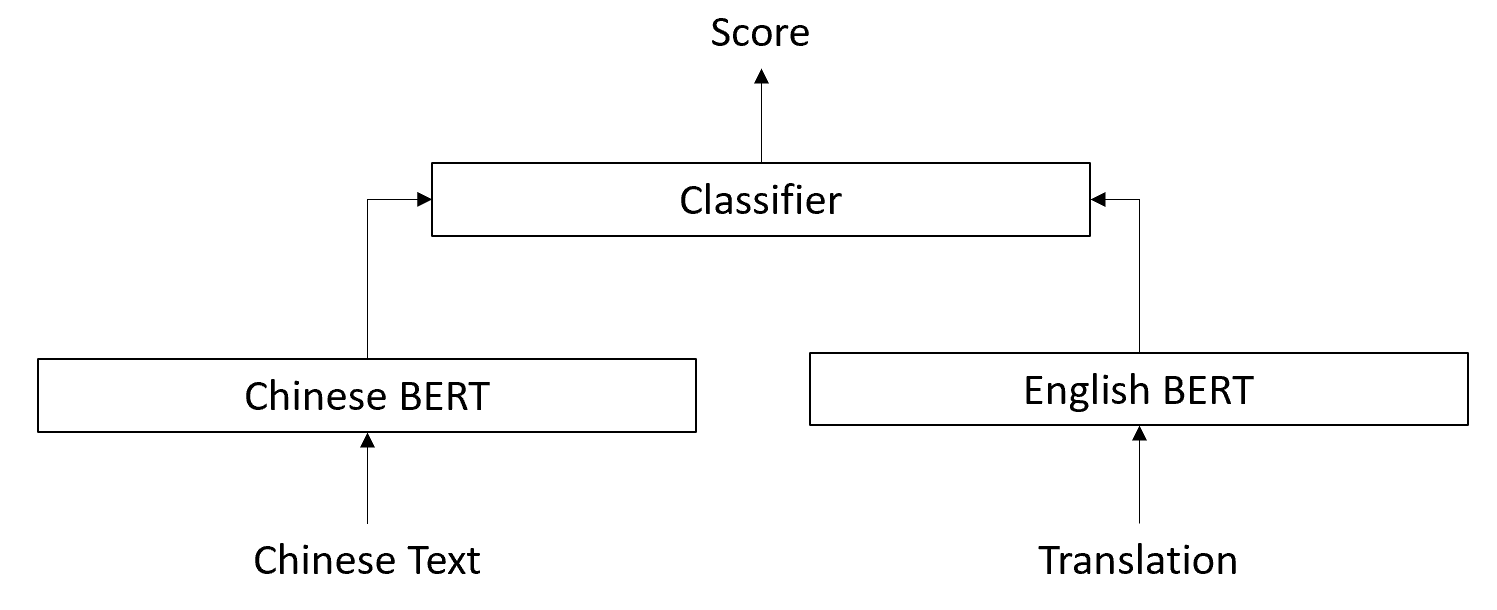

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 KB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 31.7 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer, BertModel

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model_english = BertModel.from_pretrained(model_name)

# Define input text
text = "Hello, how are you?"

# Tokenize input text
inputs = tokenizer(text, return_tensors='pt')

# Pass the input through the model
outputs = model_english(**inputs)

# Get the output of the last transformer layer
last_layer_english = outputs.last_hidden_state


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
last_layer_english

tensor([[[-0.0824,  0.0667, -0.2880,  ..., -0.3566,  0.1960,  0.5381],
         [ 0.0310, -0.1448,  0.0952,  ..., -0.1560,  1.0151,  0.0947],
         [-0.8935,  0.3240,  0.4184,  ..., -0.5498,  0.2853,  0.1149],
         ...,
         [-0.2812, -0.8531,  0.6912,  ..., -0.5051,  0.4716, -0.6854],
         [-0.4429, -0.7820, -0.8055,  ...,  0.1949,  0.1081,  0.0130],
         [ 0.5570, -0.1080, -0.2412,  ...,  0.2817, -0.3996, -0.1882]]],
       grad_fn=<NativeLayerNormBackward0>)

In [ ]:
from transformers import BertTokenizer, BertModel

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-chinese'
tokenizer_chinese = BertTokenizer.from_pretrained(model_name)
model_chinese = BertModel.from_pretrained(model_name)

# Define input text
text = "你好吗？"

# Tokenize input text
inputs = tokenizer_chinese(text, return_tensors='pt')

# Pass the input through the model
outputs = model_chinese(**inputs)

# Get the output of the last transformer layer
last_layer_chinese = outputs.last_hidden_state

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
last_layer_chinese

tensor([[[ 0.8993,  0.6283,  0.4738,  ...,  0.3302,  0.4846, -0.3281],
         [ 0.6822,  0.0242,  0.4081,  ..., -0.8359,  0.1032, -0.0708],
         [ 1.2845, -0.9336,  0.7712,  ..., -0.3048,  0.6606, -0.3670],
         [ 1.5773, -0.0639,  1.1886,  ...,  0.6986,  1.3230, -0.5251],
         [ 1.4346,  0.5668,  0.3131,  ...,  0.0054,  0.6867, -0.3713],
         [-0.0254,  0.0654,  0.5707,  ..., -0.1440,  0.4472, -0.3422]]],
       grad_fn=<NativeLayerNormBackward0>)

In [ ]:
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertModel
from torch.utils.data import DataLoader, TensorDataset

# Load pre-trained BERT models and tokenizers
model_name1 = 'bert-base-uncased'
tokenizer1 = BertTokenizer.from_pretrained(model_name1)
model1 = BertModel.from_pretrained(model_name1)
model_name2 = 'bert-base-chinese'
tokenizer2 = BertTokenizer.from_pretrained(model_name2)
model2 = BertModel.from_pretrained(model_name2)

# Define training data
sentences = ['Hello, how are you?', 'I am doing well, thank you.']
labels = [0, 1]
max_len = 128  # maximum sequence length

# Tokenize input sentences and get the last layer output of each model
inputs1 = tokenizer1(sentences, return_tensors='pt', padding=True, truncation=True, max_length=max_len)
with torch.no_grad():
    outputs1 = model1(**inputs1)[0][:, 0, :]  # take the first token's output (CLS token)
inputs2 = tokenizer2(sentences, return_tensors='pt', padding=True, truncation=True, max_length=max_len)
with torch.no_grad():
    outputs2 = model2(**inputs2)[0][:, 0, :]  # take the first token's output (CLS token)

# Concatenate the last layer outputs of both models
combined_outputs = torch.cat((outputs1, outputs2), dim=1)

# Convert labels to tensor
labels = torch.tensor(labels)

# Create a PyTorch dataset and data loader
dataset = TensorDataset(combined_outputs, labels)
loader = DataLoader(dataset, batch_size=1)

# Define a simple classifier model
class Classifier(nn.Module):
    def __init__(self, input_size, output_size):
        super(Classifier, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out

# Train the classifier model
model = Classifier(input_size=combined_outputs.shape[1], output_size=2)  # output size is 2 for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

num_epochs = 10
for epoch in range(num_epochs):
    for batch_inputs, batch_labels in loader:
        optimizer.zero_grad()
        batch_outputs = model(batch_inputs)
        loss = criterion(batch_outputs, batch_labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predicti

Epoch [1/10], Loss: 1.6755
Epoch [2/10], Loss: 1.1434
Epoch [3/10], Loss: 0.5989
Epoch [4/10], Loss: 0.2927
Epoch [5/10], Loss: 0.1621
Epoch [6/10], Loss: 0.1094
Epoch [7/10], Loss: 0.0876
Epoch [8/10], Loss: 0.0785
Epoch [9/10], Loss: 0.0746
Epoch [10/10], Loss: 0.0723


In [ ]:
df5['source'][4206]

'澳大健康科学学院副院长（研究）徐仁和、助理院长陈国凯和澳大中华医药研究院副教授王春明也分别介绍了其最新发表的重要成果。'

In [ ]:
lst= []
for i in df.index:
  inputs1 = tokenizer1(df['source'][i], return_tensors='pt', padding=True, truncation=True, max_length=max_len)
  with torch.no_grad():
    outputs1 = model1(**inputs1)[0][:, 0, :]  # take the first token's output (CLS token)
  inputs2 = tokenizer2(df['target'][i], return_tensors='pt', padding=True, truncation=True, max_length=max_len)
  with torch.no_grad():
    outputs2 = model2(**inputs2)[0][:, 0, :]  # take the first token's output (CLS token)
  combined_outputs = torch.cat((outputs1, outputs2), dim=1)
  lst.append(combined_outputs)

torch.save(torch.stack(lst),'/content/drive/MyDrive/Cours/ENSAE/3A + SFA/S2/Machine Learning for NLP/input.pt')

In [ ]:
scores = df['score'].values.tolist()
scores = [score * 100 / 6 for score in scores]
scores = torch.FloatTensor(scores)
scores.size()

torch.Size([500])

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Define the model architecture
class ScorePredictor(nn.Module):
    def __init__(self, input_size):
        super(ScorePredictor, self).__init__()
        self.linear1 = nn.Linear(input_size, 512)
        self.linear2 = nn.Linear(512, 256)
        self.linear3 = nn.Linear(256, 1)

    def forward(self, x):
        out = self.linear1(x)
        out = nn.functional.relu(out)
        out = self.linear2(out)
        out = nn.functional.relu(out)
        out = self.linear3(out)
        out = torch.sigmoid(out) * 100  # scale the output to be between 0 and 100
        return out

# Convert the input tensors and scores to PyTorch dataset
dataset = TensorDataset(torch.stack(lst), scores)

# Define the data loader
batch_size = 16
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Instantiate the model
model = ScorePredictor(input_size=1536)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    for batch_inputs, batch_scores in loader:
        optimizer.zero_grad()
        batch_outputs = model(batch_inputs)
        loss = criterion(batch_outputs.squeeze(), batch_scores)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/10], Loss: 24.5251
Epoch [2/10], Loss: 112.9146
Epoch [3/10], Loss: 274.2636
Epoch [4/10], Loss: 18.9267
Epoch [5/10], Loss: 180.2815
Epoch [6/10], Loss: 97.4078
Epoch [7/10], Loss: 145.1510
Epoch [8/10], Loss: 204.3583
Epoch [9/10], Loss: 22.0922
Epoch [10/10], Loss: 194.4640


In [ ]:
import torch
from transformers import BertTokenizer, BertModel, AdamW
from torch.utils.data import DataLoader, Dataset

# Define a custom dataset class that takes input sentence pairs and target scores
class ScoreDataset(Dataset):
    def __init__(self, sentence_pairs, scores, tokenizer1, tokenizer2, max_len):
        self.sentence_pairs = sentence_pairs
        self.scores = scores
        self.tokenizer1 = tokenizer1
        self.tokenizer2 = tokenizer2
        self.max_len = max_len

    def __len__(self):
        return len(self.sentence_pairs)

    def __getitem__(self, index):
        sentence_pair = self.sentence_pairs[index]
        score = self.scores[index]
        inputs1 = self.tokenizer1(sentence_pair[0], return_tensors='pt', padding='max_length', truncation=True, max_length=self.max_len)
        inputs2 = self.tokenizer2(sentence_pair[1], return_tensors='pt', padding='max_length', truncation=True, max_length=self.max_len)
        return inputs1, inputs2, score





# Load pre-trained BERT models and tokenizers
model_name = 'bert-base-chinese'
tokenizer1 = BertTokenizer.from_pretrained(model_name)
model1 = BertModel.from_pretrained(model_name)
model_name = 'bert-base-uncased'
tokenizer2 = BertTokenizer.from_pretrained(model_name)
model2 = BertModel.from_pretrained(model_name)

# Define input sentence pairs and target scores
sentence_pairs = [('你好吗？', 'I am doing well, thank you.'), ('你好吗？', 'Short sentence.')]
scores = [70, 30]

# Define hyperparameters
batch_size = 2
epochs = 3
lr = 2e-5
max_len = 128

# Create dataset and dataloader
dataset = ScoreDataset(sentence_pairs, scores, tokenizer1, tokenizer2, max_len)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define the model architecture
class ScoreModel(torch.nn.Module):
    def __init__(self):
        super(ScoreModel, self).__init__()
        self.bert1 = model1
        self.bert2 = model2
        self.dropout = torch.nn.Dropout(0.1)
        self.linear = torch.nn.Linear(1536, 1)

    def forward(self, inputs1, inputs2):
        outputs1 = self.bert1(inputs1['input_ids'][0])[0][:, 0, :]  # take the first token's output (CLS token)
        outputs2 = self.bert2(inputs2['input_ids'][0])[0][:, 0, :]  # take the first token's output (CLS token)
        combined_outputs = torch.cat((outputs1, outputs2), dim=1)
        pooled_output = self.dropout(combined_outputs)
        score = self.linear(pooled_output)
        return score

# Instantiate the model and move it to GPU
model = ScoreModel()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define the optimizer and loss function
optimizer = AdamW(model.parameters(), lr=lr)
loss_fn = torch.nn.MSELoss()

# Train the model
for epoch in range(epochs):
    running_loss = 0.0
    for inputs1, inputs2, score in dataloader:
        inputs1 = {k: v.to(device) for k, v in inputs1.items()}
        inputs2 = {k: v.to(device) for k, v in inputs2.items()}
        score = score.to(device)
        optimizer.zero_grad()
        output = model(inputs1,inputs2)
        score_pred = model(inputs1, inputs2).squeeze(1)
        loss = loss_fn(score_pred, score.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(dataloader)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}')
torch.save(model.state_dict(), 'score_model.pt')

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.pred

Epoch 1/3, Loss: 2910.3738
Epoch 2/3, Loss: 2720.1033
Epoch 3/3, Loss: 2537.4707


## Cross-Encoder avec sentence-transformer

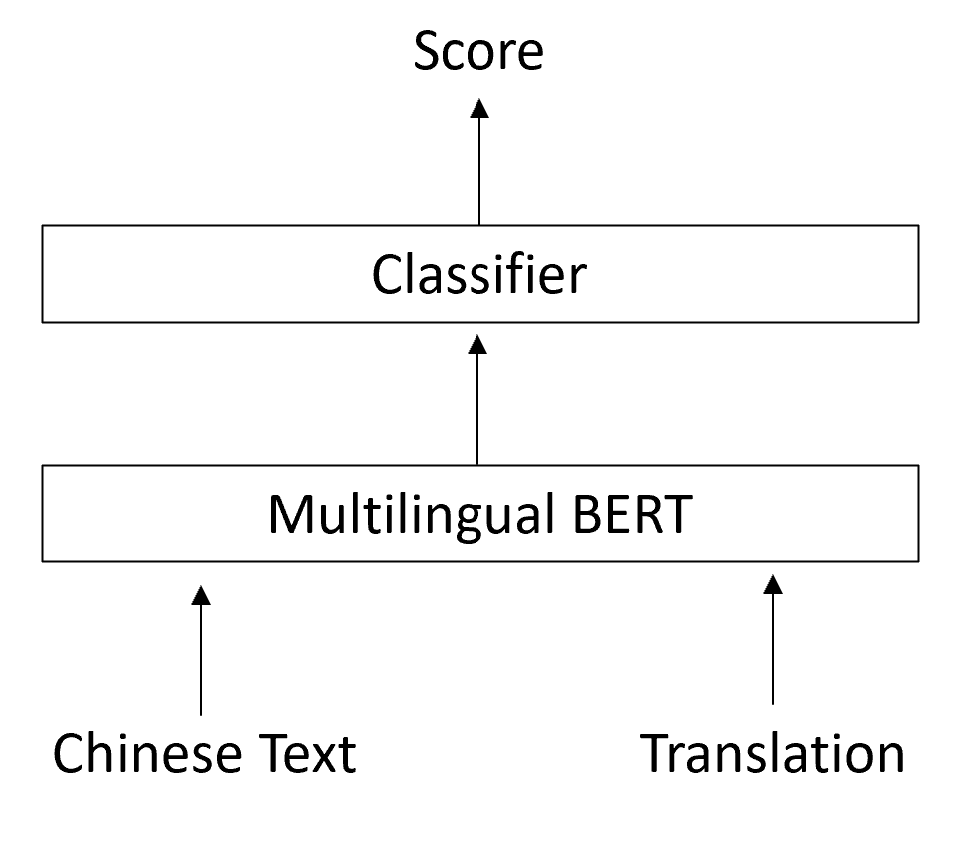

In [ ]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 88.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 25.0 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=e86940f036ba84ee7c4b20088d4032345ca45a29b332c37822749e7557a7a583
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
df['score2'] = df['score']/6
df

In [ ]:
from sentence_transformers import InputExample
train_samples = [
  InputExample(texts=[df['source'][i], df['target'][i]], label=df['score2'][i]) for i in df.index
]

In [ ]:
from sentence_transformers.cross_encoder import CrossEncoder
model = CrossEncoder('sentence-transformers/distiluse-base-multilingual-cased-v2', num_labels=1)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at sentence-transformers/distiluse-base-multilingual-cased-v2 and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from torch.utils.data import DataLoader, random_split
dataloader = DataLoader(train_samples, batch_size=32, shuffle=True)

In [ ]:
model.fit(train_dataloader=dataloader,
          epochs=2,
          output_path='/content/drive/MyDrive/Cours/ENSAE/3A + SFA/S2/Machine Learning for NLP/Cross-Encoder simple/model.pt')

model.save('/content/drive2/MyDrive/Cours/ENSAE/3A + SFA/S2/Machine Learning for NLP/Cross-Encoder simple/model_not_pretrained')

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1871 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1871 [00:00<?, ?it/s]

In [ ]:
model.save('/content/drive2/MyDrive/Cours/ENSAE/3A + SFA/S2/Machine Learning for NLP/Cross-Encoder simple/model_not_pretrained')

In [ ]:
scores = model.predict([[df['source'][1], df['target'][35]]])
scores

array([0.63756406], dtype=float32)

# Métrique non entraînables : modification de BaryScore et DepthScore à deux modèles BERT différents

On modifie les métriques pour prendre en input deux représentations issus de modèles BERT spécialisés dans chaque langage et on essaie de voir si ces métriques se transposent bien avec cette nouvelle configuration. 

### BaryScore

In [ ]:
from __future__ import absolute_import, division, print_function
import numpy as np
import torch
from tqdm import tqdm
import ot
from math import log
from collections import defaultdict, Counter
from transformers import AutoModelForMaskedLM, AutoTokenizer


class BaryScoreMetric_multibert:
    def __init__(self, model_name1="bert-base-chinese", model_name2 = "bert-base-uncased", last_layers1=5, last_layers2=5, use_idfs=True, sinkhorn_ref=0.01):
        """
        BaryScore metric
        :param model_name: model name or path from HuggingFace Librairy
        :param last_layers: last layer to use in the pretrained model
        :param use_idfs: if true use idf costs else use uniform weights
        :param sinkhorn_ref:  weight of the KL in the SD
        """

        self.model_name1 = model_name1
        self.model_name2 = model_name2
        self.load_tokenizer_and_model()
        n1 = self.model1.config.num_hidden_layers + 1
        assert n1 - last_layers1 > 0
        self.layers_to_consider1 = range(n1 - last_layers1, n1)
        n2 = self.model2.config.num_hidden_layers + 1
        assert n2 - last_layers2 > 0
        self.layers_to_consider2 = range(n2 - last_layers2, n2)
        self.use_idfs = use_idfs
        self.sinkhorn_ref = sinkhorn_ref
        self.idfs = []
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    def prepare_idfs(self, hyps, refs):
        """
        :param hyps: hypothesis list of string sentences has to be computed at corpus level
        :param refs:reference list of string sentences has to be computed at corpus level
        """
        t_hyps = self.tokenizer1(hyps)['input_ids']
        t_refs = self.tokenizer2(refs)['input_ids']
        idf_dict_ref = self.ref_list_to_idf(t_refs)
        idf_dict_hyp = self.ref_list_to_idf(t_hyps)
        idfs_tokenizer = (idf_dict_ref, idf_dict_hyp)
        self.model_ids = idfs_tokenizer
        return idf_dict_hyp, idf_dict_ref

    def ref_list_to_idf(self, input_refs):
        """
        :param input_refs: list of input reference
        :return: idf dictionnary
        """
        idf_count = Counter()
        num_docs = len(input_refs)

        idf_count.update(sum([list(set(i)) for i in input_refs], []))

        idf_dict = defaultdict(lambda: log((num_docs + 1) / (1)))
        idf_dict.update({idx: log((num_docs + 1) / (c + 1)) for (idx, c) in idf_count.items()})
        return idf_dict

    def load_tokenizer_and_model(self):
        """
        Loading and initializing the chosen model and tokenizer
        """
        tokenizer1 = AutoTokenizer.from_pretrained('{}'.format(self.model_name1))
        model1 = AutoModelForMaskedLM.from_pretrained('{}'.format(self.model_name1))
        model1.config.output_hidden_states = True
        model1.eval()
        self.tokenizer1 = tokenizer1
        self.model1 = model1
        tokenizer2 = AutoTokenizer.from_pretrained('{}'.format(self.model_name2))
        model2 = AutoModelForMaskedLM.from_pretrained('{}'.format(self.model_name2))
        model2.config.output_hidden_states = True
        model2.eval()
        self.tokenizer2 = tokenizer2
        self.model2 = model2

    def evaluate_batch(self, batch_hyps, batch_refs, idf_hyps=None, idf_ref=None):
        """
        :param batch_hyps: hypothesis list of string sentences
        :param batch_refs: reference list of string sentences
        :param idf_hyps: idfs of hypothesis computed at corpus level
        :param idf_ref: idfs of references computed at corpus level
        :return: dictionnary of scores
        """
        ###############################################
        ## Extract Embeddings From Pretrained Models ##
        ###############################################
        if isinstance(batch_hyps, str):
            batch_hyps = [batch_hyps]
        if isinstance(batch_refs, str):
            batch_refs = [batch_refs]
        nb_sentences = len(batch_refs)
        baryscores = []
        assert len(batch_hyps) == len(batch_refs)

        if (idf_hyps is None) and (idf_ref is None):
            idf_hyps, idf_ref = self.model_ids

        model1 = self.model1.to(self.device)
        model2 = self.model2.to(self.device)

        with torch.no_grad():
            ###############################################
            ## Extract Embeddings From Pretrained Models ##
            ###############################################
            batch_refs = self.tokenizer1(batch_refs, return_tensors='pt', padding=True, truncation=True).to(self.device)
            batch_refs_embeddings_ = model1(**batch_refs)[-1]

            batch_hyps = self.tokenizer2(batch_hyps, return_tensors='pt', padding=True, truncation=True).to(self.device)
            batch_hyps_embeddings_ = model2(**batch_hyps)[-1]

            batch_refs_embeddings = [batch_refs_embeddings_[i] for i in list(self.layers_to_consider1)]
            batch_hyps_embeddings = [batch_hyps_embeddings_[i] for i in list(self.layers_to_consider2)]

            batch_refs_embeddings = torch.cat([i.unsqueeze(0) for i in batch_refs_embeddings])
            batch_refs_embeddings.div_(torch.norm(batch_refs_embeddings, dim=-1).unsqueeze(-1))
            batch_hyps_embeddings = torch.cat([i.unsqueeze(0) for i in batch_hyps_embeddings])
            batch_hyps_embeddings.div_(torch.norm(batch_hyps_embeddings, dim=-1).unsqueeze(-1))

            ref_tokens_id = batch_refs['input_ids'].cpu().tolist()
            hyp_tokens_id = batch_hyps['input_ids'].cpu().tolist()

            ####################################
            ## Unbatched BaryScore Prediction ##
            ####################################
            for index_sentence in tqdm(range(nb_sentences), 'BaryScore Progress'):
                dict_score = {}
                ref_ids_idf = batch_refs['input_ids'][index_sentence]
                hyp_idf_ids = batch_hyps['input_ids'][index_sentence]

                ref_tokens = [i for i in self.tokenizer1.convert_ids_to_tokens(ref_tokens_id[index_sentence],
                                                                              skip_special_tokens=False) if
                              i != self.tokenizer1.pad_token]
                hyp_tokens = [i for i in self.tokenizer2.convert_ids_to_tokens(hyp_tokens_id[index_sentence],
                                                                              skip_special_tokens=False) if
                              i != self.tokenizer2.pad_token]

                ref_ids = [k for k, w in enumerate(ref_tokens)]
                hyp_ids = [k for k, w in enumerate(hyp_tokens)]

                # With stop words
                ref_idf_i = [idf_ref[i] for i in ref_ids_idf[ref_ids]]
                hyp_idf_i = [idf_hyps[i] for i in hyp_idf_ids[hyp_ids]]

                ref_embedding_i = batch_refs_embeddings[:, index_sentence, ref_ids, :]
                hyp_embedding_i = batch_hyps_embeddings[:, index_sentence, hyp_ids, :]
                measures_locations_ref = ref_embedding_i.permute(1, 0, 2).cpu().numpy().tolist()
                measures_locations_ref = [np.array(i) for i in measures_locations_ref]
                measures_locations_hyps = hyp_embedding_i.permute(1, 0, 2).cpu().numpy().tolist()
                measures_locations_hyps = [np.array(i) for i in measures_locations_hyps]

                # ADDED
                measures_locations_ref = [np.array(i) for i in
                                          np.array(measures_locations_ref).transpose(1, 0, 2).tolist()]
                measures_locations_hyps = [np.array(i) for i in
                                           np.array(measures_locations_hyps).transpose(1, 0,
                                                                                       2).tolist()]

                if self.use_idfs:
                    #########################
                    ## Use TF-IDF weights  ##
                    #########################
                    baryscore = self.baryscore(measures_locations_ref, measures_locations_hyps, ref_idf_i,
                                               hyp_idf_i)
                else:
                    #####################
                    ## Uniform Weights ##
                    #####################
                    baryscore = self.baryscore(measures_locations_ref, measures_locations_hyps, None, None)

                for key, value in baryscore.items():
                    dict_score['baryscore_{}'.format(key)] = value
                baryscores.append(dict_score)
            baryscores_dic = {}
            for k in dict_score.keys():
                baryscores_dic[k] = []
                for score in baryscores:
                    baryscores_dic[k].append(score[k])

        return baryscores_dic

    def baryscore(self, measures_locations_ref, measures_locations_hyps, weights_refs, weights_hyps):
        """
        :param measures_locations_ref: input measure reference locations
        :param measures_locations_hyps: input measure hypothesis locations
        :param weights_refs: references weights in the Wasserstein Barycenters
        :param weights_hyps: hypothesis weights in the Wasserstein Barycenters
        :return:
        """
        if weights_hyps is not None or weights_refs is not None:
            assert weights_refs is not None
            assert weights_hyps is not None
            weights_hyps = np.array([i / sum(weights_hyps) for i in weights_hyps]).astype(np.float64)
            weights_refs = np.array([i / sum(weights_refs) for i in weights_refs]).astype(np.float64)

        self.n_layers = len(measures_locations_ref)
        self.d_bert = measures_locations_ref[0].shape[1]
        ####################################
        ## Compute Wasserstein Barycenter ##
        ####################################
        bary_ref = self.w_barycenter(measures_locations_ref, weights_refs)
        bary_hyp = self.w_barycenter(measures_locations_hyps, weights_hyps)

        #################################################
        ## Compute Wasserstein and Sinkhorn Divergence ##
        #################################################

        C = ot.dist(bary_ref, bary_hyp)
        weights_first_barycenter = np.zeros((C.shape[0])) + 1 / C.shape[0]
        weights_second_barycenter = np.zeros((C.shape[1])) + 1 / C.shape[1]
        wasserstein_distance = ot.emd2(weights_first_barycenter, weights_second_barycenter, C,
                                       log=True)[0]
        dic_results = {
            "W": wasserstein_distance,

        }
        for reg in [10, 1, 5, 1, 0.1, 0.5, 0.01, 0.001]:
            wasserstein_sinkhorn = ot.bregman.sinkhorn2(weights_first_barycenter, weights_second_barycenter, C,
                                                        reg=reg, numItermax=10000).tolist()
            if isinstance(wasserstein_sinkhorn, list):
                wasserstein_sinkhorn = wasserstein_sinkhorn[0]  # for POT==0.7.0
            dic_results['SD_{}'.format(reg)] = wasserstein_sinkhorn
        return dic_results

    def w_barycenter(self, measures_locations, weights):
        """
        :param measures_locations: location of the discrete input measures
        :param weights: weights of the input measures
        :return: barycentrique distribution
        """
        X_init = np.zeros((measures_locations[0].shape[0], self.d_bert)).astype(np.float64)
        if weights is None:
            measures_weights = [np.array(
                [1 / measures_locations[0].shape[0]] * measures_locations[0].shape[0])] * self.n_layers
        else:
            measures_weights = [weights / sum(weights)] * self.n_layers
        b = np.array([1 / measures_locations[0].shape[0]] * measures_locations[0].shape[0]).astype(np.float64)
        mesure_bary = ot.lp.free_support_barycenter(measures_locations, measures_weights, X_init,
                                                    b=b, numItermax=1000, verbose=False)
        return mesure_bary

    @property
    def supports_multi_ref(self):
        """
        :return: BaryScore does not support multi ref
        """
        return False

In [ ]:
BaryScore_v2 = BaryScoreMetric_multibert()
ref = ['I hate these cakes!']
hypothesis = ['I like my cakes very much']

BaryScore_v2.prepare_idfs(ref, hypothesis)
final_preds = BaryScore_v2.evaluate_batch(ref, hypothesis)
print(final_preds)

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model

{'baryscore_W': [1.389879185440592], 'baryscore_SD_10': [1.4312122659599131], 'baryscore_SD_1': [1.4303424552890687], 'baryscore_SD_5': [1.431115337385767], 'baryscore_SD_0.1': [1.4221188302758494], 'baryscore_SD_0.5': [1.4293834610723686], 'baryscore_SD_0.01': [1.3926785719133155], 'baryscore_SD_0.001': [0.0]}


In [ ]:
def bary_2BERT(refs, target):
    BaryScore_v2.prepare_idfs([refs], [target])
    final_preds = BaryScore_v2.evaluate_batch([refs], [target])
    baryscore_W = final_preds['baryscore_W'][0]
    baryscore_SD_10 = final_preds['baryscore_SD_10'][0]
    baryscore_SD_1 = final_preds['baryscore_SD_1'][0]
    baryscore_SD_5 = final_preds['baryscore_SD_5'][0]
    baryscore_SD_01 = final_preds['baryscore_SD_0.1'][0]
    baryscore_SD_05 = final_preds['baryscore_SD_0.5'][0]
    baryscore_SD_001 = final_preds['baryscore_SD_0.01'][0]
    baryscore_SD_0001 = final_preds['baryscore_SD_0.001'][0] 

    return baryscore_W,baryscore_SD_10,baryscore_SD_1,baryscore_SD_5,baryscore_SD_01,baryscore_SD_05,baryscore_SD_001,baryscore_SD_0001

In [ ]:
!pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 KB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.9 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=fc8146317e665a902a1afe70eb8b713d7d91f2ed036fe731f1cbc2b04dd3aa17
  Stored in directory: /root/.cache/pip/wheels/2b/5e/f2/3931524f702ffd03309e96d35ee2fbf9c61c27377511ee8d4c
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
import swifter

In [ ]:

applied_df = df_tiny.swifter.progress_bar(True).apply(lambda row : bary_2BERT(row['source'],
                     row['target']), axis = 1, result_type='expand')
df_tiny = pd.concat([df_tiny, applied_df], axis='columns')
df_tiny = df_tiny.rename(columns= {0 :'multi_v2_baryscore_W', 1 : 'multi_v2_baryscore_SD_10',2 : 'multi_v2_baryscore_SD_1',3:'multi_v2_baryscore_SD_5', 4:'multi_v2_baryscore_SD_0.1',5:'multi_v2_baryscore_SD_0.5', 6:'multi_v2_baryscore_SD_0.01', 7 : 'multi_v2_baryscore_SD_0.001'})
df_tiny.to_csv('/content/drive/MyDrive/Cours/ENSAE/3A + SFA/S2/Machine Learning for NLP/df_last_tiny.tsv', sep ='\t')

Pandas Apply:   0%|          | 0/500 [00:00<?, ?it/s]


BaryScore Progress:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/ot/bregman.py:484: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/usr/local/lib/python3.8/dist-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)

BaryScore Progress: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

BaryScore Progress: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

BaryScore Progress: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

BaryScore Progress: 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]

BaryScore Progress: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

BaryScore Progress: 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

BaryScore Progress: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

BaryScore Progress: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

BaryScore Progress: 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

BaryScore Progress: 10

### DepthScore

In [ ]:
from __future__ import absolute_import, division, print_function
import torch
from tqdm import tqdm
from transformers import AutoModelForMaskedLM, AutoTokenizer
from sklearn.preprocessing import normalize
from sklearn.covariance import MinCovDet as MCD
from sklearn.decomposition import PCA
import logging

import ot
import geomloss

class DepthScoreMetric_multibert:
    def __init__(self, model_name1="bert-base-chinese", model_name2 = "bert-base-uncased",layers_to_consider1 = 9, layers_to_consider2=9, considered_measure='irw', p=None, eps=None,
                 n_alpha=None):

        """
        DepthScore metric
        :param model_name: model name or path from HuggingFace Librairy
        :param layers_to_consider: layer to use in the pretrained model
        :param considered_measure: measure of similarity to use should be in ["irw", "ai_irw", "wasserstein", "sliced", "mmd"]
        :param p: the power of the ground cost.
        :param eps:   the highest level set.
        :param n_alpha: The Monte-Carlo parameter for the approximation of the integral
        over alpha.
        """
        self.n_alpha = 5 if n_alpha is None else n_alpha
        self.eps = 0.3 if eps is None else eps
        self.p = 5 if p is None else p
        self.model_name1 = model_name1
        self.model_name2 = model_name2
        self.load_tokenizer_and_model()
        self.considered_measure = considered_measure
        assert considered_measure in ["irw", "ai_irw", "wasserstein", "sliced", "mmd"]
        self.layers_to_consider1 = layers_to_consider1
        assert layers_to_consider1 < self.model1.config.num_hidden_layers + 1
        self.layers_to_consider2 = layers_to_consider2
        assert layers_to_consider2 < self.model2.config.num_hidden_layers + 1
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    def load_tokenizer_and_model(self):
        """
        Loading and initializing the chosen model and tokenizer
        """
        tokenizer1 = AutoTokenizer.from_pretrained('{}'.format(self.model_name1))
        model1 = AutoModelForMaskedLM.from_pretrained('{}'.format(self.model_name1))
        model1.config.output_hidden_states = True
        model1.eval()
        self.tokenizer1 = tokenizer1
        self.model1 = model1
        tokenizer2 = AutoTokenizer.from_pretrained('{}'.format(self.model_name2))
        model2 = AutoModelForMaskedLM.from_pretrained('{}'.format(self.model_name2))
        model2.config.output_hidden_states = True
        model2.eval()
        self.tokenizer2 = tokenizer2
        self.model2 = model2

    def evaluate_batch(self, batch_hyps, batch_refs, idf_hyps=None, idf_ref=None):
        """
        :param batch_hyps: hypothesis list of string sentences
        :param batch_refs: reference list of string sentences
        :return: dictionnary of scores
        """
        ###############################################
        ## Extract Embeddings From Pretrained Models ##
        ###############################################
        if isinstance(batch_hyps, str):
            batch_hyps = [batch_hyps]
        if isinstance(batch_refs, str):
            batch_refs = [batch_refs]
        nb_sentences = len(batch_refs)
        depth_scores = []
        assert len(batch_hyps) == len(batch_refs)

        model1 = self.model1.to(self.device)
        model2 = self.model2.to(self.device)

        with torch.no_grad():
            ###############################################
            ## Extract Embeddings From Pretrained Models ##
            ###############################################
            batch_refs = self.tokenizer1(batch_refs, return_tensors='pt', padding=True, truncation=True).to(self.device)
            batch_refs_embeddings_ = model1(**batch_refs)[-1]

            batch_hyps = self.tokenizer2(batch_hyps, return_tensors='pt', padding=True, truncation=True).to(self.device)
            batch_hyps_embeddings_ = model2(**batch_hyps)[-1]

            batch_refs_embeddings = [batch_refs_embeddings_[i] for i in [self.layers_to_consider1]]
            batch_hyps_embeddings = [batch_hyps_embeddings_[i] for i in [self.layers_to_consider2]]

            batch_refs_embeddings = torch.cat([i.unsqueeze(0) for i in batch_refs_embeddings])
            batch_refs_embeddings.div_(torch.norm(batch_refs_embeddings, dim=-1).unsqueeze(-1))
            batch_hyps_embeddings = torch.cat([i.unsqueeze(0) for i in batch_hyps_embeddings])
            batch_hyps_embeddings.div_(torch.norm(batch_hyps_embeddings, dim=-1).unsqueeze(-1))

            ref_tokens_id = batch_refs['input_ids'].cpu().tolist()
            hyp_tokens_id = batch_hyps['input_ids'].cpu().tolist()

            ######################################
            ## Unbatched Depth Score Prediction ##
            ######################################
            for index_sentence in tqdm(range(nb_sentences), 'Depth Score Progress'):
                ref_tokens = [i for i in self.tokenizer1.convert_ids_to_tokens(ref_tokens_id[index_sentence],
                                                                              skip_special_tokens=False) if
                              i != self.tokenizer1.pad_token]
                hyp_tokens = [i for i in self.tokenizer2.convert_ids_to_tokens(hyp_tokens_id[index_sentence],
                                                                              skip_special_tokens=False) if
                              i != self.tokenizer2.pad_token]

                ref_ids = [k for k, w in enumerate(ref_tokens) if True]
                hyp_ids = [k for k, w in enumerate(hyp_tokens) if True]

                ref_embedding_i = batch_refs_embeddings[:, index_sentence, ref_ids, :]
                hyp_embedding_i = batch_hyps_embeddings[:, index_sentence, hyp_ids, :]
                measures_locations_ref = ref_embedding_i.permute(1, 0, 2).cpu().numpy().tolist()
                measures_locations_ref = [np.array(i) for i in measures_locations_ref]
                measures_locations_hyps = hyp_embedding_i.permute(1, 0, 2).cpu().numpy().tolist()
                measures_locations_hyps = [np.array(i) for i in measures_locations_hyps]

                dict_score = self.depth_score(measures_locations_ref, measures_locations_hyps)
                depth_scores.append(dict_score)
        depth_scores_dic = {}
        for k in dict_score.keys():
            depth_scores_dic[k] = []
            for score in depth_scores:
                depth_scores_dic[k].append(score[k])
        return depth_scores_dic

    def prepare_idfs(self, hyps, refs):
        """
        Depth Score does not use idfs
        """
        return None, None

    def depth_score(self, measures_locations_ref, measures_locations_hyps):
        """
        :param measures_locations_ref: discrete input measures of one reference
        :param measures_locations_hyps: discrete input measures of one hypothesis
        :return:
        """
        ##################################################################
        ## Compute Score between the location and hypothesis reference ##
        ##################################################################
        measures_locations_ref = np.array(measures_locations_ref).squeeze(1)
        measures_locations_hyps = np.array(measures_locations_hyps).squeeze(1)
        depth_score = dr_distance(measures_locations_ref, measures_locations_hyps, n_alpha=self.n_alpha,
                                  n_dirs=10000, data_depth=self.considered_measure, eps_min=self.eps, eps_max=1,
                                  p=self.p)
        return {'depth_score': depth_score}

    @property
    def supports_multi_ref(self):
        """
        :return: BaryScore does not support multi ref
        """
        return False


########################################################
#################### Sampled distribution ########################
########################################################


########################################################
#################### Some useful functions ########################
########################################################


def cov_matrix(X, robust=False):
    """
    :param X: input matrix
    :param robust: if true compute a robust estimate
    :return: covariance matrix of X
    """

    if robust:
        cov = MCD().fit(X)
        sigma = cov.covariance_
    else:
        sigma = np.cov(X.T)

    return sigma


def standardize(X, robust=False):
    """
    :param X:  input matrix
    :param robust: if true compute a robust estimate of the covariance matrix
    :return: square inverse f the covariance matrix of X.
    """

    sigma = cov_matrix(X, robust)
    n_samples, n_features = X.shape
    rank = np.linalg.matrix_rank(X)

    if (rank < n_features):
        pca = PCA(rank)
        pca.fit(X)
        X_transf = pca.fit_transform(X)
        sigma = cov_matrix(X_transf)
    else:
        X_transf = X.copy()

    u, s, _ = np.linalg.svd(sigma)
    square_inv_matrix = u / np.sqrt(s)

    return X_transf @ square_inv_matrix


########################################################
#################### Sampled distributions ########################
########################################################

def sampled_sphere(n_dirs, d):
    """
    :param n_dirs: number of direction to consider
    :param d: dimension of the unite sphere
    :return: ndirs samples of d-dimensional uniform distribution on the
        unit sphere
    """

    mean = np.zeros(d)
    identity = np.identity(d)
    U = np.random.multivariate_normal(mean=mean, cov=identity, size=n_dirs)

    return normalize(U)


def Wasserstein(X, Y):
    """
    :param X: input distribution X
    :param Y: input distribution Y
    :return: wasserstein distance between X and Y
    """
    M = ot.dist(X, Y)
    n = len(X)
    m = len(Y)
    w_X = np.zeros(n) + 1 / n
    w_Y = np.zeros(m) + 1 / m

    return ot.emd2(w_X, w_Y, M)


def SW(X, Y, ndirs, p=2, max_sliced=False):
    """
    :param X: input distribution X
    :param Y: input distribution Y
    :param ndirs: number of direction to consider when slicing
    :param p: order of the Sliced wasserstein distance
    :param max_sliced: if true take the maximum, if false the mean is applied
    :return: Sliced-Wasserstein distance between X and Y
    """
    n, d = X.shape
    U = sampled_sphere(ndirs, d)
    Z = np.matmul(X, U.T)
    Z2 = np.matmul(Y, U.T)
    Sliced = np.zeros(ndirs)
    for k in range(ndirs):
        Sliced[k] = ot.emd2_1d(Z[:, k], Z2[:, k], p=2)
    if (max_sliced == True):
        return (np.max(Sliced)) ** (1 / p)
    else:
        return (np.mean(Sliced)) ** (1 / p)


def MMD(X, Y):
    """
    :param X: input distribution X
    :param Y: input distribution Y
    :return:  MMD cost between X and Y
    """
    return geomloss.SamplesLoss("gaussian")(torch.tensor(X), torch.tensor(Y)).item()


########################################################
#################### Data Depths ########################
########################################################

def ai_irw(X, AI=True, robust=False, n_dirs=None, random_state=None):
    """
    :param X: Array of shape (n_samples, n_features)
            The training set.
    :param AI: bool
        if True, the affine-invariant version of irw is computed.
        If False, the original irw is computed.
    :param robust:  if robust is true, the MCD estimator of the covariance matrix
        is performed.
    :param n_dirs:   The number of random directions needed to approximate
        the integral over the unit sphere.
        If None, n_dirs is set as 100* n_features.
    :param random_state:  The random state.
    :return:   Depth score of each element in X_test, where the considered depth is (Affine-invariant-) integrated rank
        weighted depth of X_test w.r.t. X
    """

    if random_state is None:
        random_state = 0

    np.random.seed(random_state)

    if AI:
        X_reduced = standardize(X, robust)
    else:
        X_reduced = X.copy()

    n_samples, n_features = X_reduced.shape

    if n_dirs is None:
        n_dirs = n_features * 100

    # Simulated random directions on the unit sphere.
    U = sampled_sphere(n_dirs, n_features)

    sequence = np.arange(1, n_samples + 1)
    depth = np.zeros((n_samples, n_dirs))

    proj = np.matmul(X_reduced, U.T)
    rank_matrix = np.matrix.argsort(proj, axis=0)

    for k in range(n_dirs):
        depth[rank_matrix[:, k], k] = sequence

    depth = depth / (n_samples * 1.)
    depth_score = np.minimum(depth, 1 - depth)
    ai_irw_score = np.mean(depth_score, axis=1)

    return ai_irw_score


import numpy as np


def dr_distance(X, Y, n_alpha=10, n_dirs=100, data_depth='tukey', eps_min=0,
                eps_max=1, p=2, random_state=None):
    """
    :param X: array of shape (n_samples, n_features)
        The first sample.
    :param Y: array of shape (n_samples, n_features)
        The second sample.
    :param n_alpha: The Monte-Carlo parameter for the approximation of the integral
        over alpha.
    :param n_dirs: The number of directions for approximating the supremum over
        the unit sphere.
    :param data_depth: depth to consider in  {'tukey', 'projection', 'irw', 'ai_irw'}
    :param eps_min: float in [0,eps_max]
        the lowest level set.
    :param eps_max: float in [eps_min,1]
        the highest level set.
    :param p:    the power of the ground cost.
    :param random_state:  The random state.
    :return: the computed pseudo-metric score.
    """

    if random_state is None:
        random_state = 0

    np.random.seed(random_state)

    if data_depth not in {'tukey', 'projection', 'irw', 'ai_irw', 'wasserstein', 'mmd', 'sliced'}:
        raise NotImplementedError('This data depth is not implemented')

    if eps_min > eps_max:
        raise ValueError('eps_min must be lower than eps_max')

    if eps_min < 0 or eps_min > 1:
        raise ValueError('eps_min must be in [0,eps_max]')

    if eps_max < 0 or eps_max > 1:
        raise ValueError('eps_min must be in [eps_min,1]')

    _, n_features = X.shape
    if data_depth == "irw":
        depth_X = ai_irw(X, AI=False, n_dirs=n_dirs)
        depth_Y = ai_irw(Y, AI=False, n_dirs=n_dirs)
    elif data_depth == "ai_irw":
        depth_X = ai_irw(X, AI=True, n_dirs=n_dirs)
        depth_Y = ai_irw(Y, AI=True, n_dirs=n_dirs)
    elif data_depth == 'wasserstein':
        return Wasserstein(X, Y)
    elif data_depth == 'sliced':
        return SW(X, Y, ndirs=10000)
    elif data_depth == 'mmd':
        return MMD(X, Y)

        # draw n_dirs vectors of the unit sphere in dimension n_features.
    U = sampled_sphere(n_dirs, n_features)
    proj_X = np.matmul(X, U.T)
    proj_Y = np.matmul(Y, U.T)

    liste_alpha = np.linspace(int(eps_min * 100), int(eps_max * 100), n_alpha)
    quantiles_DX = [np.percentile(depth_X, j) for j in liste_alpha]
    quantiles_DY = [np.percentile(depth_Y, j) for j in liste_alpha]

    dr_score = 0
    for i in range(n_alpha):
        d_alpha_X = np.where(depth_X >= quantiles_DX[i])[0]
        d_alpha_Y = np.where(depth_Y >= quantiles_DY[i])[0]
        supp_X = np.max(proj_X[d_alpha_X], axis=0)
        supp_Y = np.max(proj_Y[d_alpha_Y], axis=0)
        dr_score += np.max((supp_X - supp_Y) ** p)

    return (dr_score / n_alpha) ** (1 / p)

In [ ]:
DepthScore_v2 = DepthScoreMetric_multibert('adamlin/bert-distil-chinese','distilbert-base-uncased', layers_to_consider1=4, layers_to_consider2 = 4)
ref = ['I hate these cakes!']
hypothesis = ['I like my cakes very much']

DepthScore_v2.prepare_idfs(ref, hypothesis)
final_preds = DepthScore_v2.evaluate_batch(ref, hypothesis)
print(final_preds)

Depth Score Progress: 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]

{'depth_score': [0.20392875381345713]}


In [ ]:
def depth_2BERT(refs, target):
    DepthScore_v2.prepare_idfs([refs], [target])
    final_preds = DepthScore_v2.evaluate_batch([refs], [target])
    depthscore = final_preds['depth_score'][0]
    return depthscore

In [ ]:
df_tiny['multi_v2_depth_score'] = df_tiny.swifter.progress_bar(True).apply(lambda row : depth_2BERT(row['source'],
                     row['target']), axis = 1)
df_tiny.to_csv('/content/drive/MyDrive/Cours/ENSAE/3A + SFA/S2/Machine Learning for NLP/df_last_tiny.tsv', sep ='\t')

Pandas Apply:   0%|          | 0/500 [00:00<?, ?it/s]


Depth Score Progress: 100%|██████████| 1/1 [00:02<00:00,  2.99s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:04<00:00,  4.41s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:03<00:00,  3.49s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:03<00:00,  3.57s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:03<00:00,  3.65s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:04<00:00,  4.16s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:04<00:00,  4.47s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:03<00:00,  3.34s/it]

Depth Score Progress: 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]

Depth Score Progress: 100%|██████

# Etude des corrélations avec le jugement humain

Cela a été fait avec un sample de 500 du dataset `df4`, par manque de ressource. Les métriques BertScore, Bleurt, BaryScore et DepthScore exigent l'utilisation d'un GPU pour un dataset avec un grand volume.

In [49]:
import pandas as pd 
from ast import literal_eval
df5 = pd.read_csv('/content/drive/MyDrive/Cours/ENSAE/3A + SFA/S2/Machine Learning for NLP/df_last_tiny_v2.tsv', sep ='\t', index_col = 0, converters={'ref': literal_eval})
df5

,source,target,score,ref,bleu,meteor,bertscore,bleurt,rouge1,rouge2,...,multi_v2_baryscore_SD_1,multi_v2_baryscore_SD_5,multi_v2_baryscore_SD_0.1,multi_v2_baryscore_SD_0.5,multi_v2_baryscore_SD_0.01,multi_v2_baryscore_SD_0.001,multi_v2_depth_score,ST_score,bertscore_multi,bertscore_multi_v2
4206,澳大健康科学学院副院长（研究）徐仁和、助理院长陈国凯和澳大中华医药研究院副教授王春明也分别介...,"Xu Renhe, Vice President (Research) of the Fac...",4.333333,[Associate Dean (Research) Xu Renhe and Assist...,0.177718,0.668762,0.920557,0.053503,0.641026,0.342105,...,1.531647,1.532076,1.526955,1.531113,1.500835,0.0,0.204478,0.818908,0.737376,0.714559
4594,研讨会共有11个学术报告，内容包括胚胎发育和组织生成、转化医学、干细胞的机制研究和转化应用，...,"The seminar had 11 academic reports, including...",4.000000,[The event included 11 themed talks on various...,0.228687,0.538194,0.931650,0.387736,0.490566,0.241379,...,1.556709,1.557216,1.550963,1.556074,1.519466,0.0,0.200384,0.943143,0.741176,0.791208
5630,针对国际社会对中国发展的关切，白皮书强调，实现国家富强、民族振兴、人民幸福，既是中国人民的梦...,In response to the concerns of the internation...,4.333333,[In response to the concerns of the internatio...,0.522419,0.792884,0.973061,0.366595,0.813953,0.690476,...,1.558114,1.558798,1.550514,1.557260,1.512610,0.0,0.184012,0.956526,0.745238,0.745214
3863,株洲市高度重视与三一集团的合作。,Zhuzhou attaches great importance to its coope...,6.000000,[Zhuzhou attaches great importance to cooperat...,1.000000,0.999500,1.000000,0.895830,1.000000,1.000000,...,1.538084,1.538604,1.532526,1.537439,1.509269,0.0,0.197361,0.693818,0.771158,0.727735
602,一次升旗仪式，大雨倾盆而下，而前来观看升旗仪式的游客却无一人离开。,"A flag-raising ceremony, the rain poured down,...",5.000000,[A heavy rain came all of a sudden during a fl...,0.872513,0.916634,0.981159,0.437706,0.933333,0.883721,...,1.499271,1.499651,1.495015,1.498795,1.469735,0.0,0.204738,0.883765,0.768593,0.740565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,分析人士指出，经贸摩擦及其带来的不确定性是导致二季度私人部门投资和出口下滑的主因。,Analysts pointed out that economic and trade f...,5.666667,[Analysts point out that economic and trade fr...,1.000000,0.999981,1.000000,0.857418,1.000000,1.000000,...,1.521186,1.521624,1.516314,1.520638,1.489023,0.0,0.201005,0.941734,0.738409,0.766935
2025,去年，习近平主席邀请穆塔里卡总统来华出席中非合作论坛北京峰会，两国元首举行了富有成果的会晤，...,"Last year, President Xi Jinping invited Presid...",3.166667,"[Last year, President Xi Jinping invited Presi...",0.644127,0.855081,0.962489,0.233522,0.831169,0.720000,...,1.554656,1.555134,1.549265,1.554057,1.517568,0.0,0.192126,0.876840,0.720429,0.734274
1266,他同时强调，只有美军撤出该地区才能实现地区安全。,"At the same time, he stressed that only the wi...",5.000000,[He also emphasized that regional security can...,0.000000,0.731148,0.955791,0.293113,0.666667,0.324324,...,1.550792,1.551405,1.544123,1.550029,1.513957,0.0,0.192614,0.922991,0.765018,0.800229
5433,这家企业只是当今云计算助力制造业转型的一个缩影。,This enterprise is just a microcosm of today's...,4.666667,[This company is just an example in today's ma...,0.000000,0.504386,0.932848,-0.080367,0.500000,0.200000,...,1.473523,1.473866,1.469751,1.473096,1.449762,0.0,0.205815,0.867280,0.756738,0.727783


In [50]:
dic = {'Metric': [], 'Pearson': [], 'Spearman' : [], 'Kendall' : []}
for metric in df5.columns[4:]:
  pearson = df5['score'].corr(df5[metric], method = 'pearson')
  spearman = df5['score'].corr(df5[metric], method = 'spearman')
  kendall = df5['score'].corr(df5[metric], method = 'kendall')
  print('{:>30} : \t Pearson {:>25}, \t Spearman {:>25}, \t Kendall {:>25}'.format(metric, pearson, spearman, kendall))
  dic['Metric'].append(metric)
  dic['Pearson'].append(pearson)
  dic['Spearman'].append(spearman)
  dic['Kendall'].append(kendall)

                          bleu : 	 Pearson        0.6596362974757919, 	 Spearman        0.7845674294046434, 	 Kendall        0.6110529238441806
                        meteor : 	 Pearson        0.6443517674560444, 	 Spearman        0.7751743139897495, 	 Kendall        0.5769147222048955
                     bertscore : 	 Pearson        0.6713455183454292, 	 Spearman        0.7939003299305115, 	 Kendall        0.6089938605251944
                        bleurt : 	 Pearson        0.7015760672033389, 	 Spearman        0.7963260465122717, 	 Kendall        0.6040442498707022
                        rouge1 : 	 Pearson        0.6583005995352602, 	 Spearman        0.7988123839798632, 	 Kendall        0.6242489093069326
                        rouge2 : 	 Pearson        0.6777701949288759, 	 Spearman        0.7930604750379923, 	 Kendall         0.616870562724041
                        rougeL : 	 Pearson         0.655965094067851, 	 Spearman        0.7945066780584206, 	 Kendall        0.618990925

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [51]:
final = pd.DataFrame.from_dict(dic)
final = final.set_index(['Metric'])
final

,Pearson,Spearman,Kendall
Metric,,,
bleu,0.659636,0.784567,0.611053
meteor,0.644352,0.775174,0.576915
bertscore,0.671346,0.793900,0.608994
bleurt,0.701576,0.796326,0.604044
rouge1,0.658301,0.798812,0.624249
rouge2,0.677770,0.793060,0.616871
rougeL,0.655965,0.794507,0.618991
rougeLsum,0.655965,0.794507,0.618991
baryscore_W,-0.561375,-0.603565,-0.438494


## Target / Référence

In [52]:
final.head(17)

,Pearson,Spearman,Kendall
Metric,,,
bleu,0.659636,0.784567,0.611053
meteor,0.644352,0.775174,0.576915
bertscore,0.671346,0.793900,0.608994
bleurt,0.701576,0.796326,0.604044
rouge1,0.658301,0.798812,0.624249
rouge2,0.677770,0.793060,0.616871
rougeL,0.655965,0.794507,0.618991
rougeLsum,0.655965,0.794507,0.618991
baryscore_W,-0.561375,-0.603565,-0.438494


In [53]:
print(final.head(17).idxmax())
print(final.head(17).max())

Pearson     bleurt
Spearman    rouge1
Kendall     rouge1
dtype: object
Pearson     0.701576
Spearman    0.798812
Kendall     0.624249
dtype: float64


In [64]:
final[['Kendall']].head(17).to_latex()

'\\begin{tabular}{lr}\n\\toprule\n{} &   Kendall \\\\\nMetric             &           \\\\\n\\midrule\nbleu               &  0.611053 \\\\\nmeteor             &  0.576915 \\\\\nbertscore          &  0.608994 \\\\\nbleurt             &  0.604044 \\\\\nrouge1             &  0.624249 \\\\\nrouge2             &  0.616871 \\\\\nrougeL             &  0.618991 \\\\\nrougeLsum          &  0.618991 \\\\\nbaryscore\\_W        & -0.438494 \\\\\nbaryscore\\_SD\\_10    & -0.195089 \\\\\nbaryscore\\_SD\\_1     & -0.261753 \\\\\nbaryscore\\_SD\\_5     & -0.201229 \\\\\nbaryscore\\_SD\\_0.1   & -0.441264 \\\\\nbaryscore\\_SD\\_0.5   & -0.348217 \\\\\nbaryscore\\_SD\\_0.01  & -0.438450 \\\\\nbaryscore\\_SD\\_0.001 &  0.139307 \\\\\ndepth\\_score        & -0.436903 \\\\\n\\bottomrule\n\\end{tabular}\n'

## Target / Source

In [58]:
final.tail(21)

,Pearson,Spearman,Kendall
Metric,,,
depth_score,-0.500916,-0.606358,-0.436903
multi_baryscore_W,-0.137279,-0.142643,-0.100542
multi_baryscore_SD_10,-0.194361,-0.212121,-0.152267
multi_baryscore_SD_1,-0.193026,-0.211178,-0.151465
multi_baryscore_SD_5,-0.194259,-0.212340,-0.152642
multi_baryscore_SD_0.1,-0.147889,-0.169007,-0.119284
multi_baryscore_SD_0.5,-0.190128,-0.208709,-0.149606
multi_baryscore_SD_0.01,-0.137188,-0.142703,-0.100525
multi_baryscore_SD_0.001,0.047921,-0.020487,-0.014129


In [55]:
print(final.tail(21).idxmax())
print(final.tail(21).max())

Pearson     ST_score
Spearman    ST_score
Kendall     ST_score
dtype: object
Pearson     0.233240
Spearman    0.231915
Kendall     0.163062
dtype: float64


In [62]:
final[['Kendall']].tail(21).to_latex()

'\\begin{tabular}{lr}\n\\toprule\n{} &   Kendall \\\\\nMetric                      &           \\\\\n\\midrule\nmulti\\_baryscore\\_W           & -0.100542 \\\\\nmulti\\_baryscore\\_SD\\_10       & -0.152267 \\\\\nmulti\\_baryscore\\_SD\\_1        & -0.151465 \\\\\nmulti\\_baryscore\\_SD\\_5        & -0.152642 \\\\\nmulti\\_baryscore\\_SD\\_0.1      & -0.119284 \\\\\nmulti\\_baryscore\\_SD\\_0.5      & -0.149606 \\\\\nmulti\\_baryscore\\_SD\\_0.01     & -0.100525 \\\\\nmulti\\_baryscore\\_SD\\_0.001    & -0.014129 \\\\\nmulti\\_depth\\_score           &  0.001253 \\\\\nmulti\\_v2\\_baryscore\\_W        & -0.044443 \\\\\nmulti\\_v2\\_baryscore\\_SD\\_10    & -0.041373 \\\\\nmulti\\_v2\\_baryscore\\_SD\\_1     & -0.041714 \\\\\nmulti\\_v2\\_baryscore\\_SD\\_5     & -0.041476 \\\\\nmulti\\_v2\\_baryscore\\_SD\\_0.1   & -0.043607 \\\\\nmulti\\_v2\\_baryscore\\_SD\\_0.5   & -0.042004 \\\\\nmulti\\_v2\\_baryscore\\_SD\\_0.01  & -0.047223 \\\\\nmulti\\_v2\\_baryscore\\_SD\\_0.001 &       NaN 

Conclusion : pour ce type de tâche, les métriques étudiées ne sont pas du tout efficaces... 